### Graph Query Formulator
Exploring the idea of generating optimal queries for elasticsearch using a graph datastructure that contains the ontologies of different courses and thus, acts like a knowledge graph.

In [1]:
import pickle
import json

import networkx as nx
import nltk
import matplotlib.pyplot as plt

In [2]:
kg = nx.DiGraph()

In [3]:
# Subject and Course nodes
kg.add_node("Computer Science", NodeType = "SubjectNode")
kg.add_node("Introduction to Algorithms", NodeType = "CourseNode")

In [4]:
# Topic 1 -- Sorting
kg.add_node("Sorting", NodeType = "TopicNode")
kg.add_node("Insertion Sort, Bubble Sort", NodeType = "ConceptNode")
kg.add_node("Merge Sort, Quick Sort", NodeType = "ConceptNode")
kg.add_node("Radix Sort, Counting Sort", NodeType = "ConceptNode")

# Topic 1 -- Edges
kg.add_edges_from([("Computer Science", "Introduction to Algorithms"),
                  ("Introduction to Algorithms", "Sorting"),
                  ("Sorting", "Insertion Sort, Bubble Sort"),
                  ("Sorting", "Merge Sort, Quick Sort"),
                  ("Sorting", "Radix Sort, Counting Sort")])

In [14]:
# Topic 2 -- Complexity
kg.add_node("Algorithmic Complexity", NodeType = "TopicNode")
kg.add_node("Big Oh Notation", NodeType ="ConceptNode")
kg.add_node("Analysis of Algorithms", NodeType ="ConceptNode")

# Topic 2 -- Edges
kg.add_edges_from([("Introduction to Algorithms", "Algorithmic Complexity"),
                  ("Algorithmic Complexity", "Big Oh Notation"),
                  ("Algorithmic Complexity","Analysis of Algorithms")])

In [33]:
# Topic 3 -- Graph Theory
kg.add_node("Graph Theory", NodeType = "TopicNode")
kg.add_node("Representations of graphs", NodeType = "ConceptNode")
kg.add_node("Breadth-first search BFS", NodeType = "ConceptNode")
kg.add_node("Depth-first search DFS", NodeType="ConceptNode")
kg.add_node("Topological Sort", NodeType="ConceptNode")
kg.add_node("Strongly Connected Components", NodeType = "ConceptNode")

# Topic 3 -- Edges
kg.add_edges_from([("Introduction to Algorithms", "Graph Theory"),
                  ("Graph Theory", "Representations of graphs"), 
                  ("Graph Theory", "Breadth-first search BFS"),
                  ("Graph Theory", "Depth-first search DFS"),
                  ("Graph Theory", "Topological Sort"),
                  ("Graph Theory", "Strongly Connected Components"),
                  ("Breadth-first search BFS", "Depth-first search DFS"),
                  ("Depth-first search DFS", "Breadth-first search BFS")])

In [16]:
# Topic 4 -- Divide-and-Conquer
kg.add_node("Divide and Conquer", NodeType="TopicNode")
kg.add_node("Maximum subarray", NodeType="ConceptNode")
kg.add_node("Strassen's matrix multiplication", NodeType="ConceptNode")
kg.add_node("Substitution method solving recurrences", NodeType="ConceptNode")
kg.add_node("Recursion-tree method solving recurrences", NodeType="ConceptNode")
kg.add_node("Master method solving recurrences", NodeType="ConceptNode")

kg.add_edges_from([("Introduction to Algorithms", "Divide and Conquer"),
                  ("Divide and Conquer", "Maximum subarray"),
                  ("Divide and Conquer", "Strassen's matrix multiplication"),
                  ("Divide and Conquer", "Substitution method solving recurrences", "")
                  ])

In [17]:
kg.add_node("Probablistic Analysis and Randomized Algorithms", NodeType="TopicNode")
kg.add_node("Hiring problem", NodeType="ConceptNode")
kg.add_node("Randomized algorithms", NodeType="ConceptNode")


In [18]:
kg.add_node("Heapsort", NodeType="TopicNode")
kg.add_node("Heaps", NodeType="ConceptNode")
kg.add_node("Maintaining heap property", NodeType="ConceptNode")
kg.add_node("Heapsort algorithm", NodeType="ConceptNode")
kg.add_node("Priority queues", NodeType="ConceptNode")

In [32]:
kg.add_node("Medians and Order Statistics")
kg.add_node("Minimum and Maximum")

In [20]:
kg.add_node("Dynamic Programming", NodeType="TopicNode")
kg.add_node("Rod cutting", NodeType="ConceptNode")
kg.add_node("Elements of dynamic programming", NodeType="ConceptNode")
kg.add_node("Longest common subsequence", NodeType="ConceptNode")
kg.add_node("Optimal binary search trees", NodeType="ConceptNode")

In [21]:
kg.add_node("Greedy Algorithms", NodeType="TopicNode")
kg.add_node("Activity selection problem", NodeType="ConceptNode")
kg.add_node("Huffman codes", NodeType="ConceptNode")

In [22]:
kg.add_node("Minimum Spanning Trees", NodeType="TopicNode")
kg.add_node("Growing a minimum spanning tree", NodeType="ConceptNode")
kg.add_node("Kruskal and Prim algorithms", NodeType="ConceptNode")

In [26]:
kg.add_node("Single source shortest paths", NodeType="TopicNode")
kg.add_node("Bellman-Ford algorithm", NodeType="ConceptNode")
kg.add_node("single source shortest path in directed acyclic graphs", NodeType="ConceptNode")
kg.add_node("Dijkstra's algorithm", NodeType="ConceptNode")

In [27]:
kg.add_node("All pairs shortest paths", NodeType="TopicNode")
kg.add_node("Shortest paths and matrix multiplication", NodeType="ConceptNode")
kg.add_node("The Floyd-Warshall algorithm", NodeType="ConceptNode")
kg.add_node("Johnson's algorithm for sparse graphs", NodeType="ConceptNode")

In [28]:
kg.add_node("Maximum Flow", NodeType="TopicNode")
kg.add_node("Flow networks", NodeType="ConceptNode")
kg.add_node("The Ford Fulkerson method", NodeType="ConceptNode")
kg.add_node("Maximum bipartite matching", NodeType="ConceptNode")

In [30]:
kg.add_node("Multithreaded algorithms", NodeType="TopicNode")
kg.add_node("Basics of dynamic multithreading", NodeType="ConceptNode")
kg.add_node("Multithreaded Matrix Multiplication", NodeType="ConceptNode")
kg.add_node("Multithreaded merge sort", NodeType="ConceptNode")

In [31]:
kg.add_node("Linear Programming", NodeType="TopicNode")
kg.add_node("Formulating problems as linear programs", NodeType="ConceptNode")
kg.add_node("Simplex algorithm", NodeType="ConceptNode")
kg.add_node("Duality", NodeType="ConceptNode")
kg.add_node("Basic feasible solution", NodeType="ConceptNode")

In [24]:
# Cross topic edges
kg.add_edge("Sorting", "Analysis of Algorithms")
kg.add_edge("Sorting", "Topological Sort")

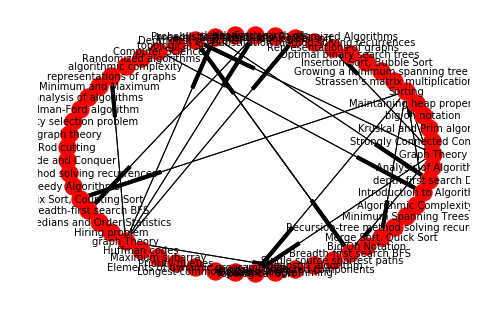

In [25]:
def draw_graph(kg):
    pos=nx.circular_layout(kg) # positions for all nodes
    nx.draw(kg, pos, node_color='w',
            width=1.0, 
            edge_cmap=plt.cm.Blues,
           with_labels=True, font_size=10)

    nx.draw(kg, pos, font_size=10, arrows=True)
    plt.show()
draw_graph(kg)

In [9]:
def get_closest_distance_node(query, kg):
    nodes = kg.nodes()
    mi, val = None, None
    for node in nodes:
        dist = nltk.distance.edit_distance(node, query)
        if(mi == None or dist < mi): 
            mi = dist
            val = node
        if(query in node and (kg.node[node]["NodeType"] == "ConceptNode" or query not in val)): return node
    return val

def get_closest_node(query, kg):
    if(query in kg): 
        return query, kg.node[query]
    else: 
        node_label = get_closest_distance_node(query, kg)
        return node_label, kg.node[node_label]

In [10]:
def query_formulator(kg, query):
    queries = []
    current_node, node = get_closest_node(query, kg)
    children_neighbours = kg.neighbors(current_node)
    
    for child in children_neighbours:
        queries.append(current_node+" "+child)
    return queries

In [11]:
query_formulator(kg, "sorting")

['Sorting Merge Sort, Quick Sort',
 'Sorting Insertion Sort, Bubble Sort',
 'Sorting Topological Sort',
 'Sorting Radix Sort, Counting Sort',
 'Sorting Analysis of Algorithms']

In [12]:
kg.node["Computer Science"]

{'NodeType': 'SubjectNode'}